# **K-Means Clustering**

K-Means clustering is a straightforward and efficient method for partitioning a dataset into K clusters. It involves iteratively assigning data points to clusters and updating centroids until convergence. Despite its simplicity, K-Means is powerful and widely used in various applications, from market segmentation to image compression.

Procedure of K-Means Clustering:


1.   Choose the number of clusters K.
2.   Assign each data point to the nearest cluster centroid. This can be done by calculating the Euclidean distance from each data point to each centroid and assigning the data point to the cluster with the closest centroid.
3.   Recalculate the centroids by taking the mean of all data points assigned to each cluster. The new centroid is the average of the points in the cluster.
4.   Repeat the assignment and update steps until the centroids no longer change significantly. This indicates that the clusters are stable.

**Evaluation of K-Means**


1.   **Elbow Method** (optimal number of clusters K)
2.   **Silhouette Score** (Measure how similar a data point is to its own cluster compared to other clusters)



**Loading Dataset**

In [3]:
import pandas as pd
df = pd.read_csv("/content/sample_data/bookstore_sales_data.csv")

In [4]:
print(df.head())

   Store_ID  Region  Fiction  Non_Fiction  SciFi  Mystery  Textbooks  Comics
0      1001       3      690         3258   1440     1541        807    1986
1      1002       4     2800         2243    260     1031       3265    1401
2      1003       1     1480         3921   1138     1897       3093    1869
3      1004       3     3475         2338   1839      394       1232    1792
4      1005       3     1684         3790   2289      854       2702    2447


### **Dataset Description: Online Bookstore Sales Data**  

This dataset contains **500 rows** of sales data from various bookstores, with details about different book categories sold in **four regions**. Each row represents a **store's sales record**, and the columns describe sales volume for different book genres.  

---

### **Column Descriptions:**
- **Store_ID** *(Integer)* – Unique identifier for each bookstore (ranging from 1001 to 1500).  
- **Region** *(Integer)* – Geographic region where the store is located (values: 1, 2, 3, or 4).  
- **Fiction** *(Integer)* – Number of fiction books sold.  
- **Non_Fiction** *(Integer)* – Number of non-fiction books sold.  
- **SciFi** *(Integer)* – Number of science fiction books sold.  
- **Mystery** *(Integer)* – Number of mystery books sold.  
- **Textbooks** *(Integer)* – Number of textbooks sold.  
- **Comics** *(Integer)* – Number of comic books sold.  

---

### **Dataset Characteristics:**
- The **sales figures** for each genre are generated randomly within a reasonable range, ensuring a diverse distribution.  
- **Store_IDs** are sequential from 1001 to 1500.  
- **Regions** are distributed among **four categories (1 to 4)** to represent different locations.  
- The dataset can be used for **sales analysis, trend forecasting, and regional performance comparison**.  

# **EDA**

In [5]:
df.shape

(500, 8)

**Interpretation**: The dataset has 500 rows of data and 8 different attributes.

In [6]:
df.dtypes

,0
Store_ID,int64
Region,int64
Fiction,int64
Non_Fiction,int64
SciFi,int64
Mystery,int64
Textbooks,int64
Comics,int64


In [7]:
duplicate_df = df[df.duplicated()]
duplicate_df.count()

,0
Store_ID,0
Region,0
Fiction,0
Non_Fiction,0
SciFi,0
Mystery,0
Textbooks,0
Comics,0


**Intrepretation**: The dataset has no duplicated values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Store_ID     500 non-null    int64
 1   Region       500 non-null    int64
 2   Fiction      500 non-null    int64
 3   Non_Fiction  500 non-null    int64
 4   SciFi        500 non-null    int64
 5   Mystery      500 non-null    int64
 6   Textbooks    500 non-null    int64
 7   Comics       500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB


**Interpretation**: The info method also shows the number of data in each column and the null count of each column along with the data type.

In [9]:
print(df.isnull().sum())

Store_ID       0
Region         0
Fiction        0
Non_Fiction    0
SciFi          0
Mystery        0
Textbooks      0
Comics         0
dtype: int64


**Interpretation**: This shows that there is no null values in the data, if there were null values we would have use dropna or fillna.

In [10]:
print(df.describe())

          Store_ID      Region      Fiction  Non_Fiction        SciFi  \
count   500.000000  500.000000   500.000000   500.000000   500.000000   
mean   1250.500000    2.592000  2800.182000  2261.150000  1503.582000   
std     144.481833    1.150732  1272.026192  1084.672655   794.199994   
min    1001.000000    1.000000   503.000000   310.000000   201.000000   
25%    1125.750000    2.000000  1716.250000  1288.500000   870.750000   
50%    1250.500000    3.000000  2795.000000  2316.500000  1457.500000   
75%    1375.250000    4.000000  3845.750000  3259.750000  2190.250000   
max    1500.000000    4.000000  4995.000000  3995.000000  2995.000000   

           Mystery    Textbooks       Comics  
count   500.000000   500.000000   500.000000  
mean   1072.944000  3242.476000  1409.908000  
std     528.340603  1568.370808   662.619747  
min     101.000000   616.000000   150.000000  
25%     619.000000  1883.750000   826.250000  
50%    1099.000000  3162.500000  1468.500000  
75%    1485.7

**Interpretation**: The describe functions shows various statistics of the dataset. Such as here we can interpret that the average amount spend per person on detergents at wholesale store is $2881.

There are only three regions from where are people visit hence the min region is 1 and max region is 3.

# **Dataset Visualization**

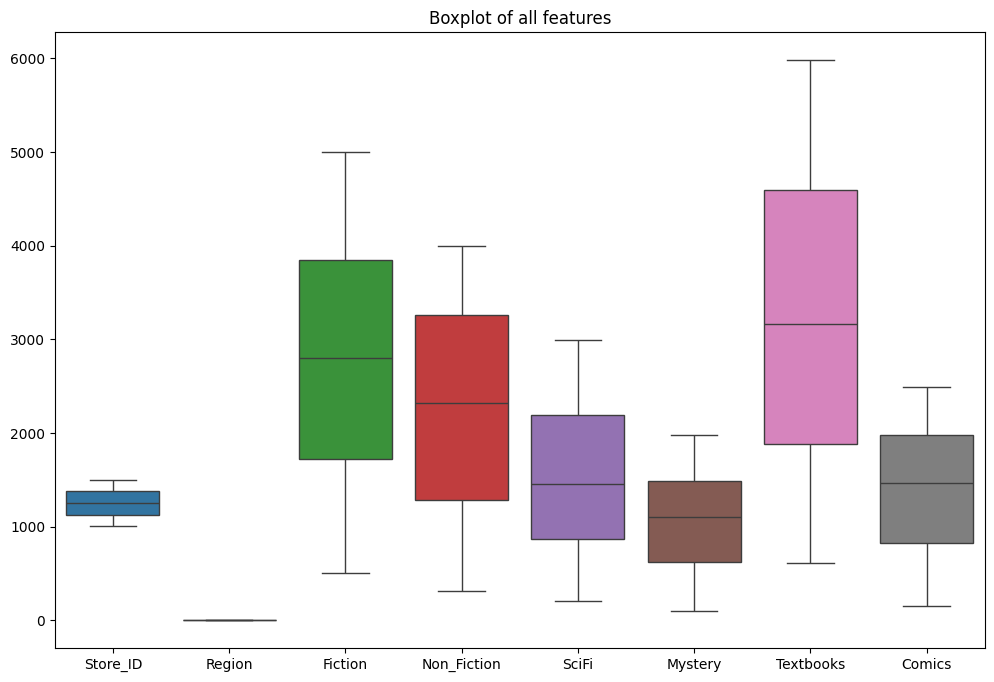

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of all features')
plt.show()

**Interpretation**: This makes it very evident that the values of the attribute are spread in different scales. For e.g., the store is either 1 or 2, the Region 1, 2 or 3, while on the other hand the spendings by people on textbooks going even higher that 5000.

This creates the necessity to implement feature scaling to remove bias from the data.

We will have to employ the IQR method to remove the outliers.

# **Visualizations to understand relationships between attributes**

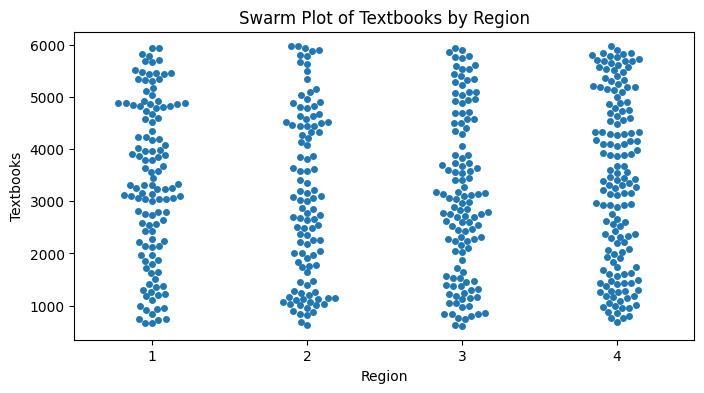

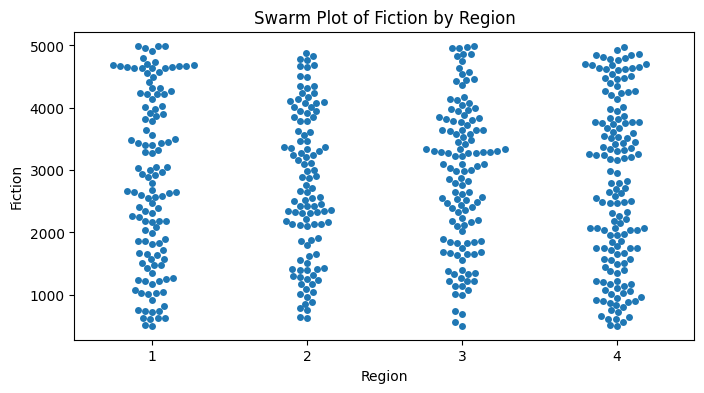

In [26]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='Region', y='Textbooks', data=df)
plt.title('Swarm Plot of Textbooks by Region')
plt.show()

plt.figure(figsize=(8, 4))
sns.swarmplot(x='Region', y='Fiction', data=df)
plt.title('Swarm Plot of Fiction by Region')
plt.show()

**Interpretation**: The above Swarm Plot shows that the dataset firstly has more people belonging to region 3 (indicating the most customers are from region 3, maybe due to the store being located near region 3).

Aslo it can be seen that people from region 3 tend to spend more , followed by region 1 and people of region 2 spend the least.

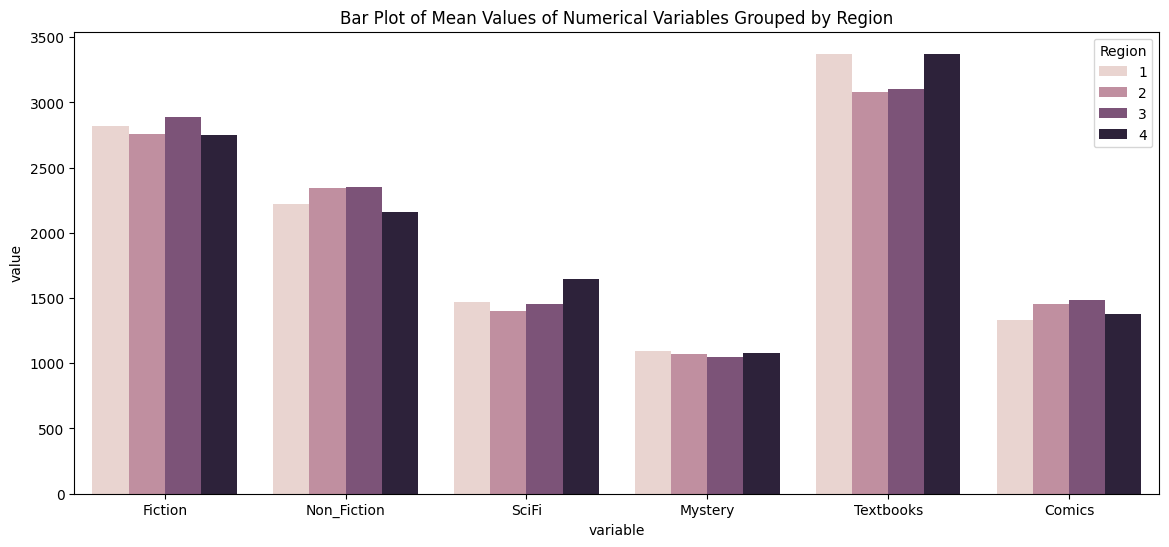

In [13]:
df_means = df.groupby('Region').mean().reset_index()
df_means_melted = df_means.melt(id_vars=['Region'], value_vars=['Fiction', 'Non_Fiction', 'SciFi', 'Mystery', 'Textbooks', 'Comics'])


plt.figure(figsize=(14, 6))
sns.barplot(x='variable', y='value', hue='Region', data=df_means_melted)
plt.title('Bar Plot of Mean Values of Numerical Variables Grouped by Region')
plt.show()

**Interpretation**: The above multiple bar plot shows that People tents to spend more on fiction and textbooks more than other items.

Also that People from region 3 spend most on Fiction but people of region 4 spend higher on textbooks.

# **Removal Of Outliers**

In [14]:
df.shape

(500, 8)

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Store_ID        249.50
Region            2.00
Fiction        2129.50
Non_Fiction    1971.25
SciFi          1319.50
Mystery         866.75
Textbooks      2713.75
Comics         1155.25
dtype: float64


In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(500, 8)

# **Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Region_encoded'] = label_encoder.fit_transform(df['Region'])
X = df[['Region_encoded', 'Fiction', 'Non_Fiction', 'SciFi', 'Mystery', 'Textbooks', 'Comics']].values
print(X)

[[   2  690 3258 ... 1541  807 1986]
 [   3 2800 2243 ... 1031 3265 1401]
 [   0 1480 3921 ... 1897 3093 1869]
 ...
 [   3 3332 2643 ... 1426  804 2193]
 [   0 3324 1340 ... 1116 1181 2398]
 [   3 2494 1964 ...  410 1440  946]]


**Interpretation**: Here, we have used label encoding to encode the categorical variable region.

# **Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features)

**Interpretation**: Employed Standard Scaler to scale down the values to a fixed range so that the bias from the model is eleminated.

# **Using the Elbow Method to Find the Optimal Number of Clusters**

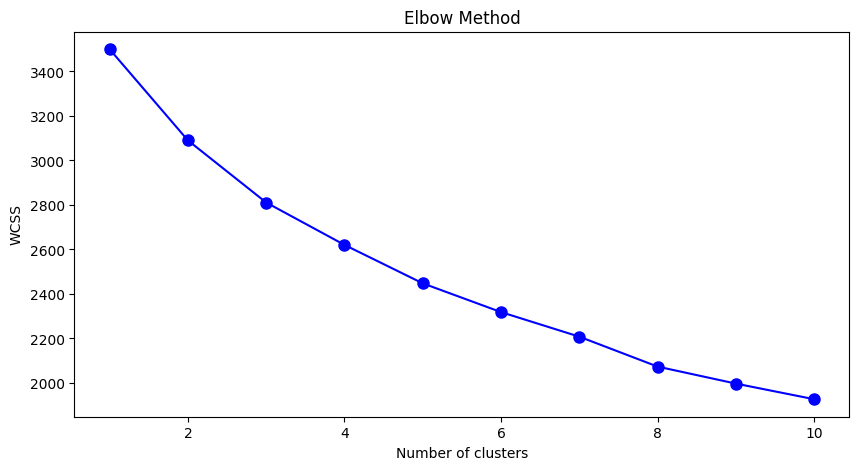

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Interpretation**: Here using Elbow curve we can see the most suitable k values can either be 3 or 6.

# **Training the K-Means Model on the Dataset**

In [20]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# **Visualizing the Clusters**

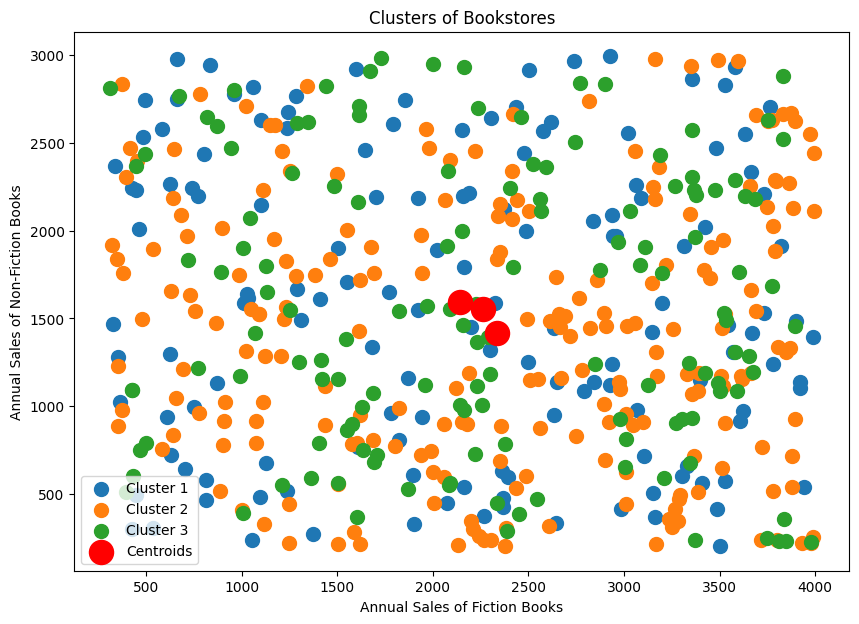

In [21]:
plt.figure(figsize=(10, 7))

for i in range(optimal_clusters):
    plt.scatter(X[y_kmeans == i, 2], X[y_kmeans == i, 3], s=100, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
plt.title('Clusters of Bookstores')
plt.xlabel('Annual Sales of Fiction Books')
plt.ylabel('Annual Sales of Non-Fiction Books')
plt.legend()
plt.show()

### **Interpretation of Clusters in Bookstore Sales Data**  

The **red dots** represent the **centroids** of the clusters.

---

### **Cluster 1 (Blue)**  
- This cluster represents bookstores with **low to moderate annual sales** of both **Fiction and Non-Fiction books**.  
- These stores generally **sell fewer books compared to other clusters**.  
- They may be **small, independent bookstores** with a niche audience or limited stock.  

### **Cluster 2 (Orange)**  
- This cluster includes bookstores with **moderate to high sales of Non-Fiction books** but **lower to moderate sales of Fiction books**.  
- These stores **prioritize educational and informational books**, catering mainly to **students, professionals, or academic institutions**.  
- Fiction sales are **relatively lower**, indicating that these stores focus more on knowledge-based content.  

### **Cluster 3 (Green)**  
- This cluster represents bookstores with **high sales of Fiction books** and **moderate to high sales of Non-Fiction books**.  
- These are **high-performing bookstores**, selling a **wide range of books across genres**.  
- They may include **large chains, online retailers, or popular bookstores** with a broad customer base.  

---

### **Business Strategy Based on Clusters**  

- **Cluster 1:** Small bookstores might benefit from marketing campaigns or promotions on bestsellers to increase sales.  
- **Cluster 2:** These bookstores could be targeted with discounts on bulk academic book purchases and partnerships with schools/universities.  
- **Cluster 3:** High-selling bookstores might respond well to premium book offerings, loyalty programs, or author meet-and-greet events.  

This clustering approach helps bookstores optimize inventory, enhance marketing strategies, and improve customer engagement.  


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to test
k_values = [2, 3, 4, 5, 6]

# Dictionary to store silhouette scores
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_df)  # Using your preprocessed data

    # Calculate silhouette score
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Find the optimal k with the highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters based on Silhouette Score: k={best_k}")


Silhouette Score for k=2: 0.1157
Silhouette Score for k=3: 0.1128
Silhouette Score for k=4: 0.1112
Silhouette Score for k=5: 0.1133
Silhouette Score for k=6: 0.1203

Optimal number of clusters based on Silhouette Score: k=6


The **most optimal** number of clusters is **k = 6**, since it has the **highest silhouette score (0.1203)**.  

### **Explanation:**  
- The silhouette score measures how well-separated the clusters are.  
- A **higher score** indicates **better-defined clusters** with minimal overlap.  
- **k = 6 has the highest score (0.1203)** compared to other values.  




# **Results and Interpretation**

In [23]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)



Cluster Centers:
[[1.48591549e+00 1.64409155e+03 2.14111972e+03 1.59100000e+03
  1.10169014e+03 4.49994366e+03 1.37063380e+03]
 [1.65753425e+00 2.75990411e+03 2.33636073e+03 1.41517808e+03
  1.05611416e+03 1.76024658e+03 1.46345662e+03]
 [1.59712230e+00 4.04468345e+03 2.26527338e+03 1.55356115e+03
  1.07009353e+03 4.29317986e+03 1.36566187e+03]]


**Interpretation**: The above array shows the values of all attributes for each of the 3 centriods.